### Unsupervise Learning--- Clustering Methods
#### 1. In the original datasets of Uber Eats Restaurants, we do not have any target variable to predict.

#### 2.Unsupervised learning refers to the use of artificial intelligence (AI) algorithms to detect, explore or identify patterns in data sets containing data points that are neither classified nor labeled.
#### 3.Clustering helps in understanding the natural grouping in a dataset. Their purpose is to make sense to partition the data into some group of logical groupings. Clustering quality depends on the methods and the identification of hidden patterns.
#### 4.Clustering methods used:

K-means:
 
 1.the points within a cluster should be similar to each other.
 
 2.our aim here is to minimize the distance between the points within a cluster.
 
 3.after applying PCA using scaled data, Elbow Curve shows the best cluter k is 3.

Hierarchical Clustering Linkage Methods
 
 1.identify the two clusters that are closest together, 
 
 2.merge the two most similar clusters. 
 
 3.This iterative process continues until all the clusters are merged together.
 
 4.In our analysis, the linkage method is Ward: Similar to the k-means as it minimizes the sum of squared differences within all clusters but with a hierarchical approach
 
 5.Two major clusters shows in the dendrogram.
 
Density-Based Spatial Clustering of Application with Noise
 
 1. Classify the points.
 
 2. Discard noise.
 
 3. Assign cluster to a core point.
 
 4. Color all the density connected points of a core point.
 
 5. Color boundary points according to the nearest core point.
 
 6. Initial the DBSCAN model: eps=1, min_samples=10
 
 7. The model returns 4 clusters, as well as outliers (noise)
 
#### 3. Results 
 
Based on the different approaches of clustering analysis , the plots show that there are some cetain grouping patterns in our datasets.

#### 4. Disadvantages with unsupervised learning

##### 1.uncertainty about the accuracy of the unsupervised learning outputs, as there are no labeled data sets to verify the results;
##### 2. difficulty interpreting and labeling results with unsupervised learning than they would with supervised learning; and the lack of full insight into how or why an unsupervised system reaches its results.
##### 3. overestimate the similarities in the input objects. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Part 1: Prepare the Data

In [2]:
file_path=Path("Resources/restaurants.csv")
restaurant_df=pd.read_csv(file_path)
restaurant_df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [3]:
restaurant_df.columns

Index(['id', 'position', 'name', 'score', 'ratings', 'category', 'price_range',
       'full_address', 'zip_code', 'lat', 'lng'],
      dtype='object')

In [4]:
restaurant_df.isnull().value_counts()

id     position  name   score  ratings  category  price_range  full_address  zip_code  lat    lng  
False  False     False  False  False    False     False        False         False     False  False    19118
                        True   True     False     False        False         False     False  False    14281
                                                  True         False         False     False  False     3508
                        False  False    False     True         False         False     False  False     3019
                        True   True     False     False        True          True      False  False      110
                        False  False    False     False        True          True      False  False       62
                        True   True     False     True         True          True      False  False       56
                        False  False    False     True         True          True      False  False       50
                        True

In [5]:
restaurant_df1=restaurant_df.dropna()
restaurant_df1


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170
19,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260
...,...,...,...,...,...,...,...,...,...,...,...
40222,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441
40223,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821
40224,40225,52,EurAsia Ramen 3,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200
40225,40226,51,Austin's Habibi (5th St),4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110


In [6]:
restaurant_df1.isnull().value_counts()

id     position  name   score  ratings  category  price_range  full_address  zip_code  lat    lng  
False  False     False  False  False    False     False        False         False     False  False    19118
dtype: int64

In [7]:
restaurant_df2=restaurant_df1.drop(columns=["id","name","category","full_address","zip_code","lat","lng"])
restaurant_df2.head()

,position,score,ratings,price_range
6,27,4.7,63.0,$
13,51,4.6,44.0,$
15,88,5.0,20.0,$$$
18,30,4.9,48.0,$
19,40,3.7,19.0,$$


In [8]:
restaurant_df2["price_range"].value_counts()

$       14548
$$       4460
$$$       101
$$$$        9
Name: price_range, dtype: int64

In [9]:
#transform price_range
def changeprice(price):
    if price=="$":
        return 1
    elif price=="$$":
        return 2
    elif price=="$$$":
        return 3
    elif price=="$$$$":
        return 4
restaurant_df2["price_range"]=restaurant_df2["price_range"].apply(changeprice)
restaurant_df2


,position,score,ratings,price_range
6,27,4.7,63.0,1
13,51,4.6,44.0,1
15,88,5.0,20.0,3
18,30,4.9,48.0,1
19,40,3.7,19.0,2
...,...,...,...,...
40222,54,4.8,500.0,1
40223,53,4.6,245.0,1
40224,52,4.7,293.0,1
40225,51,4.7,208.0,2


In [10]:
restaurant_df2.isnull().value_counts()

position  score  ratings  price_range
False     False  False    False          19118
dtype: int64

## Part 2. K-means
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

In [11]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(restaurant_df2)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbowdata = {"k": k, "inertia": inertia}
dfelbow = pd.DataFrame(elbowdata)
dfelbow.head()

,k,inertia
0,1,1.998577e+08
1,2,1.286574e+08
2,3,7.254956e+07
3,4,5.438308e+07
4,5,4.299436e+07


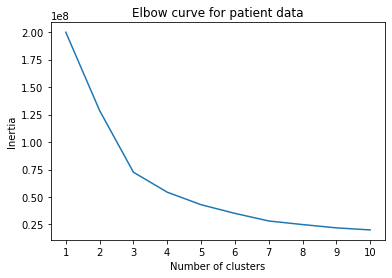

In [12]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(dfelbow['k'], dfelbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for patient data')
plt.show()

In [13]:
# Initializing model with K = 3
model = KMeans(n_clusters=3, random_state=1)

In [14]:
# Fitting model
model.fit(restaurant_df2)

KMeans(n_clusters=3, random_state=1)

In [15]:
# Get predictions// no training data here
predictions = model.predict(restaurant_df2)
print(predictions)

[0 0 0 ... 1 1 1]


In [16]:
predictions.sum()

11830

In [17]:
pd.Series(predictions).value_counts()


0    11719
2     4431
1     2968
dtype: int64

In [18]:
restaurant_df2["class"] = model.labels_
restaurant_df2

,position,score,ratings,price_range,class
6,27,4.7,63.0,1,0
13,51,4.6,44.0,1,0
15,88,5.0,20.0,3,0
18,30,4.9,48.0,1,0
19,40,3.7,19.0,2,0
...,...,...,...,...,...
40222,54,4.8,500.0,1,1
40223,53,4.6,245.0,1,1
40224,52,4.7,293.0,1,1
40225,51,4.7,208.0,2,1


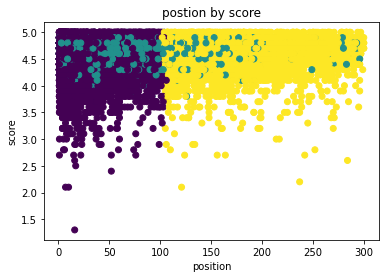

In [38]:
plt.scatter(x= restaurant_df2["position"], y= restaurant_df2['score'], c= restaurant_df2['class'])
plt.xlabel('position')
plt.ylabel('score')
plt.title("postion by score")
plt.show()

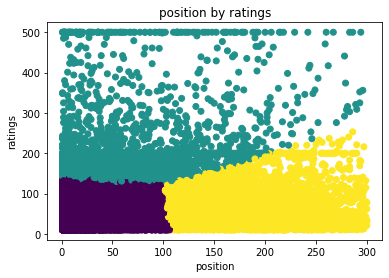

In [39]:
plt.scatter(x= restaurant_df2["position"], y= restaurant_df2['ratings'], c= restaurant_df2['class'])
plt.xlabel('position')
plt.ylabel('ratings')
plt.title("position by ratings")
plt.show()

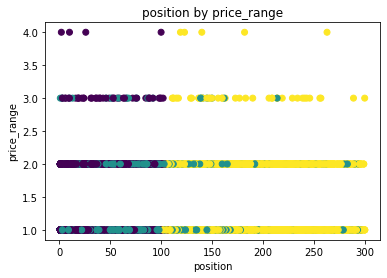

In [40]:
plt.scatter(x= restaurant_df2["position"], y= restaurant_df2['price_range'], c= restaurant_df2['class'])
plt.xlabel('position')
plt.ylabel('price_range')
plt.title("position by price_range")
plt.show()

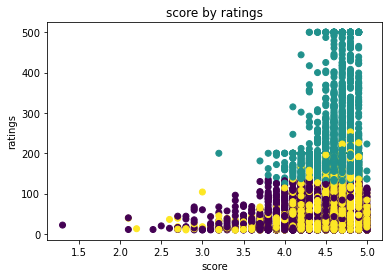

In [41]:
plt.scatter(x= restaurant_df2["score"], y= restaurant_df2['ratings'], c= restaurant_df2['class'])
plt.xlabel('score')
plt.ylabel('ratings')
plt.title("score by ratings")
plt.show()

#### Perform dimensionality reduction with PCA

In [23]:
# Create a scaler to standardize the data
scaler = StandardScaler()

In [24]:
# Train the scaler with the data
X_Scaled=scaler.fit_transform(restaurant_df2)
X_Scaled[0]

array([-0.6119883 ,  0.47792634, -0.19972798, -0.55049854, -0.73989433])

In [25]:
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
restaurant_pca = pca.fit_transform(X_Scaled)

In [26]:
restaurant_pca

array([[-0.91411555, -0.61403026, -0.40719971, -0.33156234],
       [-0.81274062, -0.15024266, -0.56073485, -0.27782965],
       [ 0.16281459,  0.68113305,  3.20903694, -2.8214289 ],
       ...,
       [ 0.83219394, -2.26295297,  0.68360858,  1.72853248],
       [ 0.78389294, -0.8546786 ,  2.22017763,  0.32741147],
       [ 0.49728564, -1.26085268,  0.4891273 ,  2.11123084]])

In [27]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.37509812, 0.22547773, 0.19897469, 0.16299904])

In [28]:
pca.explained_variance_ratio_.sum()

0.9625495882009925

#### Perform a Cluster Analysis with K-means based on PCA

In [29]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(restaurant_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,92010.115136
1,2,61986.091830
2,3,48412.446359
3,4,37260.361154
4,5,30625.803408


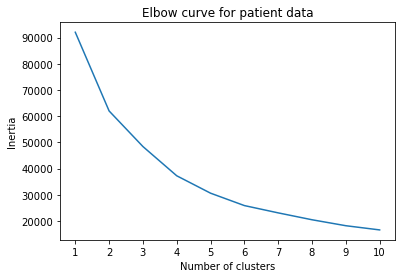

In [30]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for patient data')
plt.show()

In [31]:
# Create a Dataframe from the PCA transformed data for K-Means Modelling and plotting
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
pca_df=pd.DataFrame(restaurant_pca,columns=columns)
pca_df['class']=km.labels_
pca_df.head()

,1,2,3,4,class
0,-0.914116,-0.614030,-0.407200,-0.331562,6
1,-0.812741,-0.150243,-0.560735,-0.277830,6
2,0.162815,0.681133,3.209037,-2.821429,7
3,-0.799553,-0.941681,-0.507750,-0.938135,6
4,-1.366511,2.805187,1.379001,0.983407,4


In [32]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=1)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

#### Analyzing Clusters with the Best Value of k

In [100]:
clusters = get_clusters(3, pca_df)

In [101]:
clusters

,1,2,3,4,class
0,-0.914116,-0.614030,-0.407200,-0.331562,1
1,-0.812741,-0.150243,-0.560735,-0.277830,1
2,0.162815,0.681133,3.209037,-2.821429,1
3,-0.799553,-0.941681,-0.507750,-0.938135,1
4,-1.366511,2.805187,1.379001,0.983407,1
...,...,...,...,...,...
19113,1.544628,-4.177562,1.816925,3.255422,0
19114,0.630043,-1.637522,0.421716,1.555865,0
19115,0.832194,-2.262953,0.683609,1.728532,0
19116,0.783893,-0.854679,2.220178,0.327411,0


In [102]:
clusters["class"].value_counts()

1    11746
2     4431
0     2941
Name: class, dtype: int64

In [103]:
def show_clusters(df):
    plt.scatter(pca_df[1], pca_df[2], c=pca_df['class'])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title("PCA_Clusters")
    plt.show()

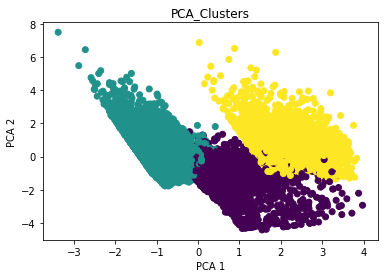

In [104]:
show_clusters(clusters)

In [105]:
def show_clusters(df):
    plt.scatter(pca_df[1], pca_df[3], c=pca_df['class'])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 3')
    plt.title("PCA_Clusters")
    plt.show()

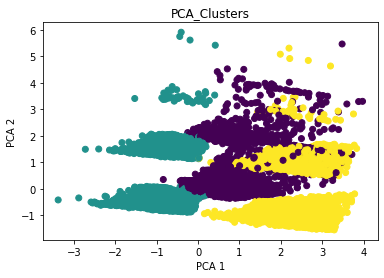

In [106]:
show_clusters(clusters)

In [107]:
def show_clusters(df):
    plt.scatter(pca_df[1], pca_df[4], c=pca_df['class'])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 4')
    plt.title("PCA_Clusters")
    plt.show()

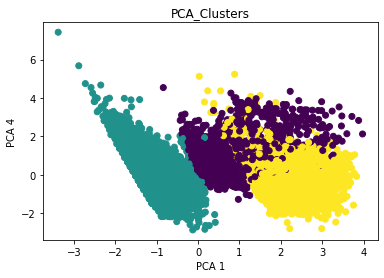

In [108]:
show_clusters(clusters)

In [109]:
def show_clusters(df):
    plt.scatter(pca_df[2], pca_df[3], c=pca_df['class'])
    plt.xlabel('PCA 2')
    plt.ylabel('PCA 3')
    plt.title("PCA_Clusters")
    plt.show()

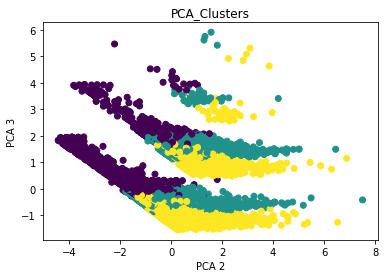

In [110]:
show_clusters(clusters)

In [111]:
def show_clusters(df):
    plt.scatter(pca_df[2], pca_df[4], c=pca_df['class'])
    plt.xlabel('PCA 2')
    plt.ylabel('PCA 4')
    plt.title("PCA_Clusters")
    plt.show()

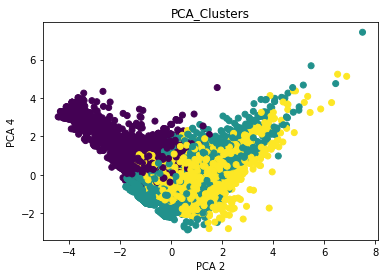

In [112]:
show_clusters(clusters)

In [113]:
def show_clusters(df):
    plt.scatter(pca_df[3], pca_df[4], c=pca_df['class'])
    plt.xlabel('PCA 3')
    plt.ylabel('PCA 4')
    plt.title("PCA_Clusters")
    plt.show()

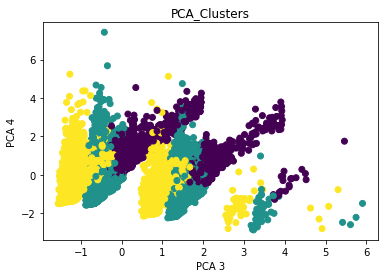

In [114]:
show_clusters(clusters)

## Part 3 Hierarchical Clustering Linkage Methods


In [57]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [58]:
df3=restaurant_df2.drop(["class"],axis=1)
df3

,position,score,ratings,price_range
6,27,4.7,63.0,1
13,51,4.6,44.0,1
15,88,5.0,20.0,3
18,30,4.9,48.0,1
19,40,3.7,19.0,2
...,...,...,...,...
40222,54,4.8,500.0,1
40223,53,4.6,245.0,1
40224,52,4.7,293.0,1
40225,51,4.7,208.0,2


In [59]:
# Normalize the data
normalized = normalize(df3)

In [60]:
normalized[:3]

array([[0.39295482, 0.06840325, 0.91689459, 0.01455388],
       [0.75531439, 0.0681264 , 0.65164379, 0.01481009],
       [0.97310369, 0.05528998, 0.22115993, 0.03317399]])

In [61]:
df=pd.DataFrame(normalized)
df.head()

,0,1,2,3
0,0.392955,0.068403,0.916895,0.014554
1,0.755314,0.068126,0.651644,0.014810
2,0.973104,0.055290,0.221160,0.033174
3,0.527942,0.086231,0.844708,0.017598
4,0.899231,0.083179,0.427135,0.044962


In [62]:
df.columns = df3.columns

In [63]:
df.head()

,position,score,ratings,price_range
0,0.392955,0.068403,0.916895,0.014554
1,0.755314,0.068126,0.651644,0.014810
2,0.973104,0.055290,0.221160,0.033174
3,0.527942,0.086231,0.844708,0.017598
4,0.899231,0.083179,0.427135,0.044962


In [64]:
# Perform hierarchical clustering
mergings = linkage(normalized, method='ward')

In [65]:
mergings[:5]

array([[9.6320e+03, 1.6807e+04, 0.0000e+00, 2.0000e+00],
       [1.3300e+04, 1.5143e+04, 0.0000e+00, 2.0000e+00],
       [1.3840e+03, 1.4123e+04, 0.0000e+00, 2.0000e+00],
       [1.4835e+04, 1.9120e+04, 0.0000e+00, 3.0000e+00],
       [1.3210e+03, 1.5719e+04, 0.0000e+00, 2.0000e+00]])

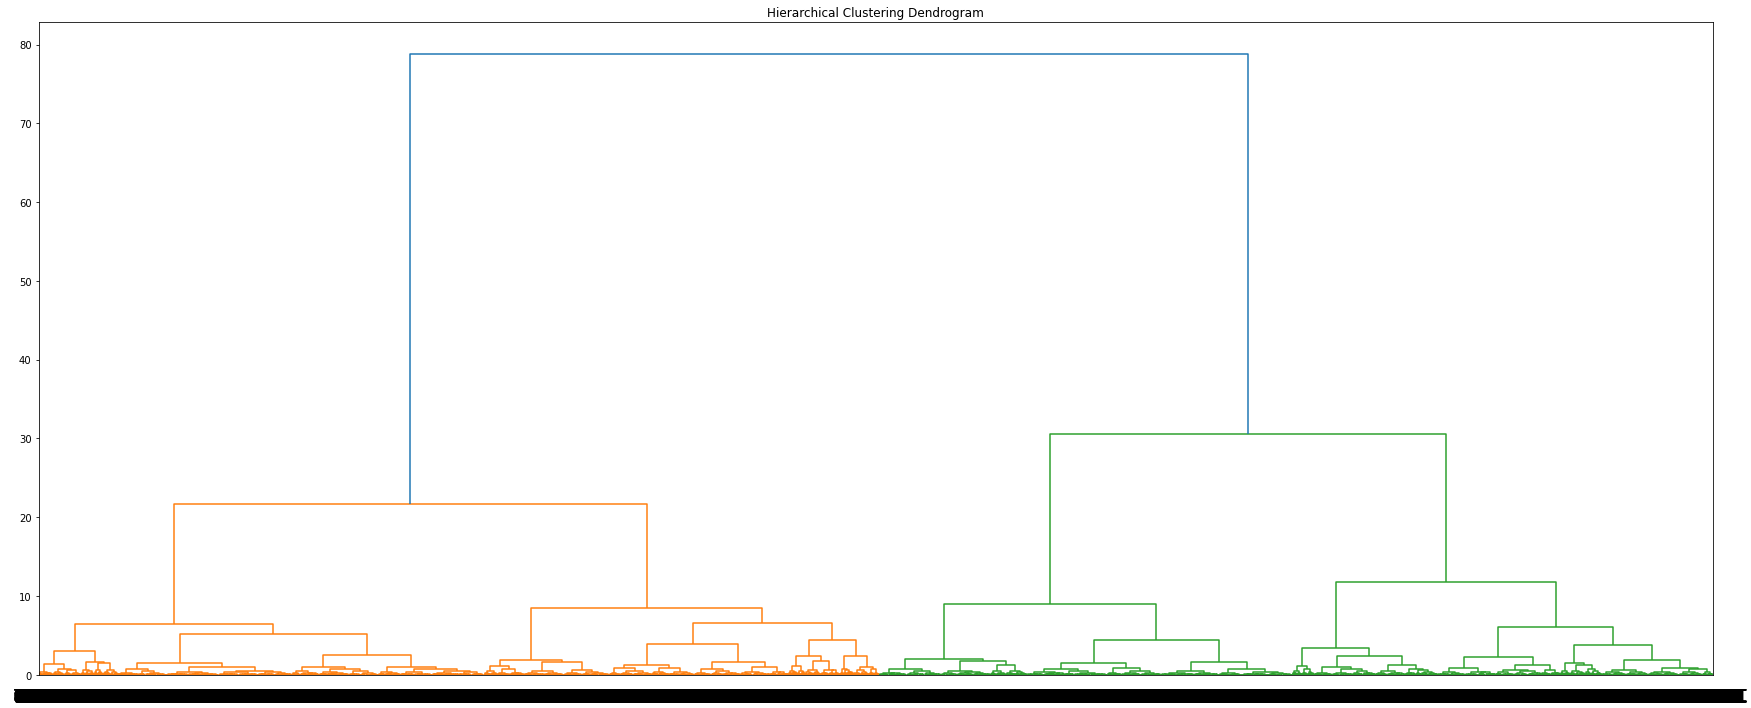

In [66]:
# Generate a dendrogram
plt.figure(figsize=(30,12))

dendrogram(mergings,
          leaf_rotation=180,
          leaf_font_size=20)
plt.title("Hierarchical Clustering Dendrogram")

plt.show()

In [67]:
# Generate cluster labels with sklearn.cluster's AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,
                                 affinity='euclidean',
                                 linkage='ward')
labels = cluster.fit_predict(df)

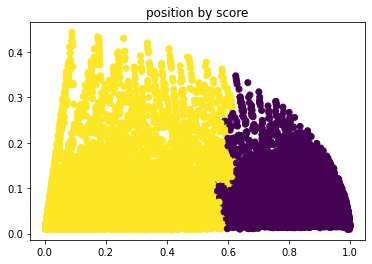

In [68]:
# Create a scatter plot with two of the features
plt.scatter(df['position'], df['score'], c=labels)
plt.title("position by score")
plt.show()

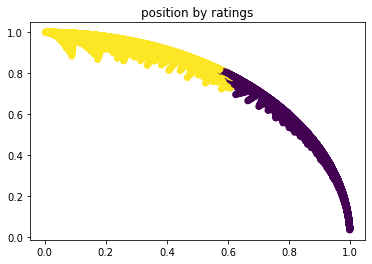

In [69]:
plt.scatter(df['position'], df['ratings'], c=labels)
plt.title("position by ratings")
plt.show()

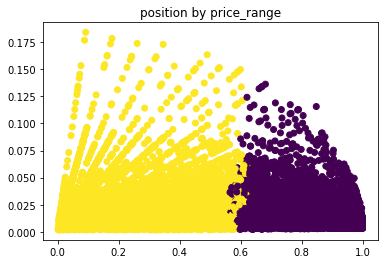

In [70]:
plt.scatter(df['position'], df['price_range'], c=labels)
plt.title("position by price_range")
plt.show()

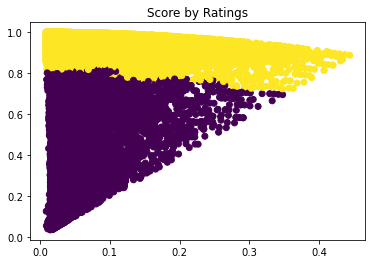

In [71]:
plt.scatter(df['score'], df['ratings'], c=labels)
plt.title("Score by Ratings")
plt.show()

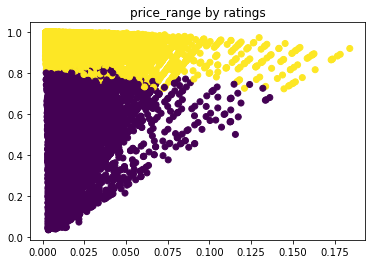

In [72]:
plt.scatter(df['price_range'], df['ratings'], c=labels)
plt.title("price_range by ratings")
plt.show()

## Part 4 Density-Based Spatial Clustering of Application with Noise

In [73]:
from sklearn.cluster import DBSCAN

In [74]:
y=restaurant_df2["class"].values
X=restaurant_df2.drop(["class"],axis=1).values

In [75]:
# Scale the data
# data=restaurant_df2
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

In [76]:
features_standardized 

array([[-0.6119883 ,  0.47792634, -0.19972798, -0.55049854],
       [-0.27208386,  0.14031934, -0.45666983, -0.55049854],
       [ 0.25193548,  1.49074734, -0.78122797,  3.9384889 ],
       ...,
       [-0.25792117,  0.47792634,  2.91062084, -0.55049854],
       [-0.27208386,  0.47792634,  1.7611441 ,  1.69399518],
       [-0.28624654, -0.53489465,  2.38321387, -0.55049854]])

In [77]:
df2 = pd.DataFrame()

In [78]:
df2['x'] =features_standardized [:,0]
df2['y'] = features_standardized [:,1]

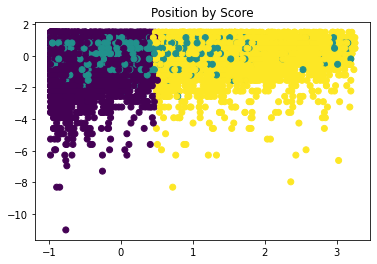

In [86]:
plt.scatter(df2['x'], df2['y'],c=y)
plt.title("Position by Score")
plt.show()

In [80]:
# Instantiate the model
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan.fit(features_standardized)

DBSCAN(eps=1, min_samples=10)

#### Epsilon is just a number that represents the radius of the circle around a particular point that we are going to consider the neighborhood of that point.

In [81]:
# A sample of the DBSCAN cluster labels
labels = dbscan.labels_
labels[::10]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
# The model returns 4 clusters, as well as outliers (noise)
set(labels)

{-1, 0, 1, 2}

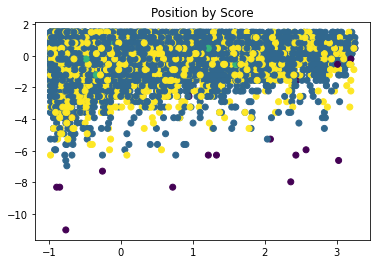

In [87]:
plt.scatter(df2['x'], df2['y'], c=labels)
plt.title("Position by Score")
plt.show()

In [84]:
df2['x1'] =features_standardized [:,0]
df2['y1'] = features_standardized [:,2]

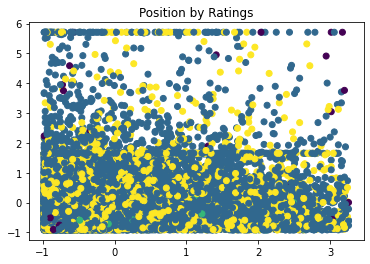

In [88]:
plt.scatter(df2['x1'], df2['y1'], c=labels)
plt.title("Position by Ratings")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

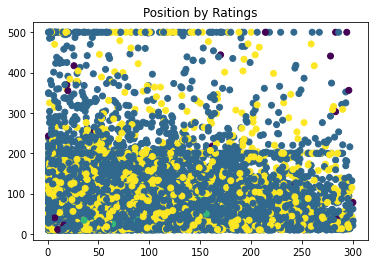

In [91]:
# Plot the results, clustered by DBSCAN
data=restaurant_df2
plt.scatter(data["position"], data["ratings"], c=labels)
plt.title("Position by Ratings")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

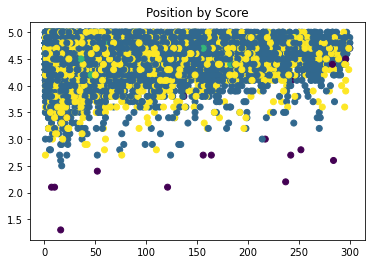

In [90]:
# Plot the results, clustered by DBSCAN
plt.scatter(data["position"], data["score"], c=labels)
plt.title("Position by Score")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

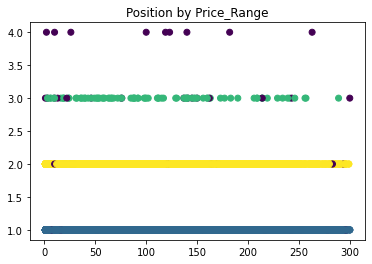

In [92]:
# Plot the results, clustered by DBSCAN
plt.scatter(data["position"], data["price_range"], c=labels)
plt.title("Position by Price_Range")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

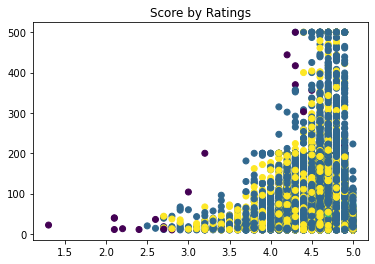

In [93]:
# Plot the results, clustered by DBSCAN
plt.scatter(data["score"], data["ratings"], c=labels)
plt.title("Score by Ratings")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

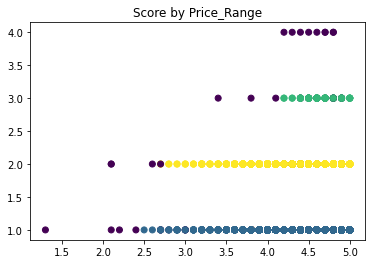

In [94]:
# Plot the results, clustered by DBSCAN
plt.scatter(data["score"], data["price_range"], c=labels)
plt.title("Score by Price_Range")
plt.show